In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense,Softmax
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt

# !pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

print("Path to dataset files:", path)

p:\VirtualEnvs\p_ds\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 64.4M/64.4M [00:19<00:00, 3.50MB/s]

Extracting files...


Path to dataset files: C:\Users\devar\.cache\kagglehub\datasets\samuelcortinhas\cats-and-dogs-image-classification\versions\4


In [3]:
img_height, img_width = 32, 32  # Resize all images to same size
batch_size = 64

train_dataset = image_dataset_from_directory(
    f'{path}/train',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int'   # gives integer labels
)

test_dataset = image_dataset_from_directory(
    f'{path}/test',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int'
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


Epoch 1/10


p:\VirtualEnvs\p_ds\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.5063 - loss: 2.7128 - val_accuracy: 0.5000 - val_loss: 0.7033
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.4901 - loss: 0.8233 - val_accuracy: 0.5000 - val_loss: 0.7335
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5314 - loss: 0.7102 - val_accuracy: 0.4857 - val_loss: 0.7067
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5566 - loss: 0.6788 - val_accuracy: 0.4643 - val_loss: 0.6963
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5871 - loss: 0.6613 - val_accuracy: 0.5000 - val_loss: 0.7456
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5943 - loss: 0.6749 - val_accuracy: 0.5143 - val_loss: 0.7516
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5978 - loss: 0.6539 - val_accuracy: 0.5071 - val_loss: 0.7641
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6140 - loss: 0.6471 - val_accuracy: 0.5143 - val_loss: 0.7265
Epoch 9/10


ValueError: cannot reshape array of size 3072 into shape (128,128,3)

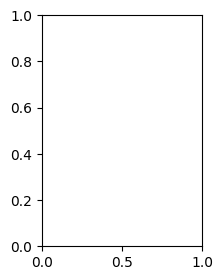

In [4]:
def flatten_and_normalize(images, labels):
    images = tf.reshape(images, (tf.shape(images)[0], -1)) / 255.0
    return images, labels

train_dataset = train_dataset.map(flatten_and_normalize)
test_dataset = test_dataset.map(flatten_and_normalize)

class_names = ["cat","dog"]  # Put your class names here
num_classes = len(class_names)


input_shape = img_height * img_width * 3  # 3 channels for RGB
model = Sequential([
    Dense(512, activation='relu', input_shape=(input_shape,)),
    Dense(256, activation='relu'),
    Dense(num_classes)
])


model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(train_dataset, epochs=10, validation_data=test_dataset)

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}")


probability_model = Sequential([model, Softmax()])

for images, labels in test_dataset.take(1):
    predictions = probability_model.predict(images)
    for i in range(5):
        print(f"Predicted: {class_names[tf.argmax(predictions[i])]}, True: {class_names[labels[i]]}")


for images, labels in test_dataset.take(1):
    predictions = probability_model.predict(images)
    plt.figure(figsize=(12, 3))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].numpy().reshape(128, 128, 3))
        pred_label = class_names[tf.argmax(predictions[i])]
        true_label = class_names[labels[i]]
        color = 'green' if pred_label == true_label else 'red'
        plt.title(pred_label, color=color)
        plt.axis('off')
    plt.show()